#1-Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

#2-Load the Dataset

In [2]:
import pandas as pd

df = pd.read_csv("SuperStoreOrders.csv")
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


#3-Number of Rows and Columns

In [3]:
df.shape

(51290, 21)

#4-Data Types of columns

In [6]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

#5-convert Data Columns to Datetime

In [12]:
df["order_date"] = pd.to_datetime(
    df["order_date"],
    errors="coerce",
    infer_datetime_format=True
)

df["ship_date"] = pd.to_datetime(
    df["ship_date"],
    errors="coerce",
    infer_datetime_format=True)

C:\Users\hello\AppData\Local\Temp\ipykernel_4644\2624521689.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["order_date"] = pd.to_datetime(
C:\Users\hello\AppData\Local\Temp\ipykernel_4644\2624521689.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["ship_date"] = pd.to_datetime(


Convert numeric columns

In [32]:
df["sales"] = pd.to_numeric(df["sales"], errors="coerce")
df["quantity"] = pd.to_numeric(df["quantity"], errors="coerce")
df["discount"] = pd.to_numeric(df["discount"], errors="coerce")
df["profit"] = pd.to_numeric(df["profit"], errors="coerce")
df["shipping_cost"] = pd.to_numeric(df["shipping_cost"], errors="coerce")

In [33]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

#6-Checking for Missing Values

In [34]:
df.isnull().sum()

order_id              0
order_date        31223
ship_date         31456
ship_mode             0
customer_name         0
segment               0
state                 0
country               0
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales              2630
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
year                  0
dtype: int64

#7-Checking for Duplicate Rows

In [35]:
df.duplicated().sum()

np.int64(0)

8-Descriptive Summary Statistics

In [36]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,20067,19834,48660.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-04-04 09:40:45.029152256,2013-04-14 00:24:19.312292096,161.017838,3.476545,0.142908,28.641740,26.375915,2012.777208
min,2011-01-01 00:00:00,2011-01-02 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2012-05-04 00:00:00,2012-05-09 00:00:00,29.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-06-04 00:00:00,2013-06-05 00:00:00,77.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-04-06 00:00:00,2014-04-08 00:00:00,208.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-12 00:00:00,2015-07-01 00:00:00,999.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,201.092519,2.278766,0.212280,174.424113,57.296804,1.098931


9. Univariate Analysis

Number of Orders by Category

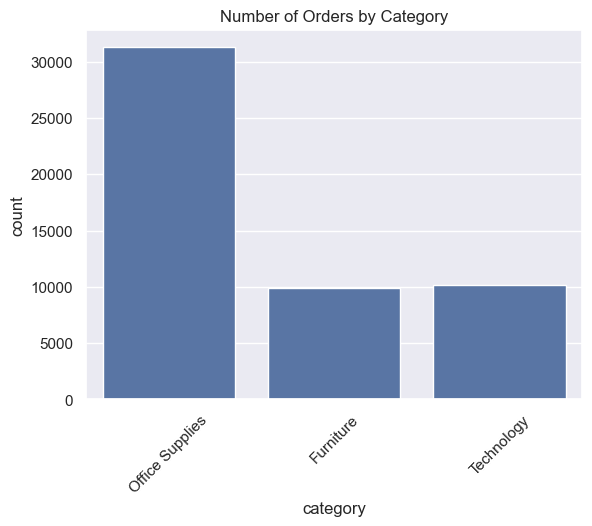

In [37]:
sns.countplot(x="category", data=df)
plt.xticks(rotation=45)
plt.title("Number of Orders by Category")
plt.show()

The chart shows that Office Supplies has the highest number of orders compared to the other categories. This indicates that customers purchase office-related products more frequently than Furniture and Technology items. Furniture and Technology have relatively similar order counts, but both are significantly lower than Office Supplies.

Distribution of Sales

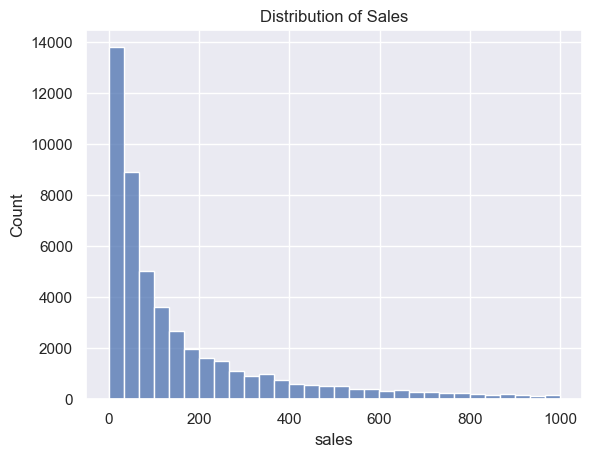

In [38]:
sns.histplot(df["sales"], bins=30)
plt.title("Distribution of Sales")
plt.show()

The distribution of sales is highly right-skewed, indicating that most transactions involve relatively low sales amounts, while a small number of orders have significantly higher sales values. This suggests the presence of high-value transactions that create a long tail in the distribution.

10. Bivariate Analysis

Sales vs Profit

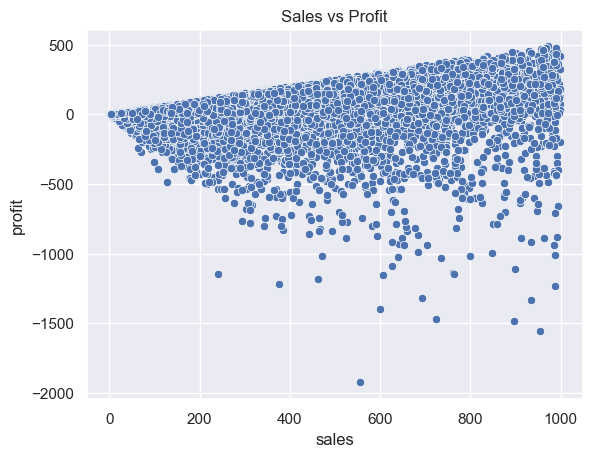

In [39]:
sns.scatterplot(x="sales", y="profit", data=df)
plt.title("Sales vs Profit")
plt.show()

The scatter plot shows a positive relationship between sales and profit, indicating that higher sales generally lead to higher profits. However, there are several transactions with negative profit values even at high sales levels, suggesting that some sales result in losses, possibly due to high discounts or costs.

Sales by Region

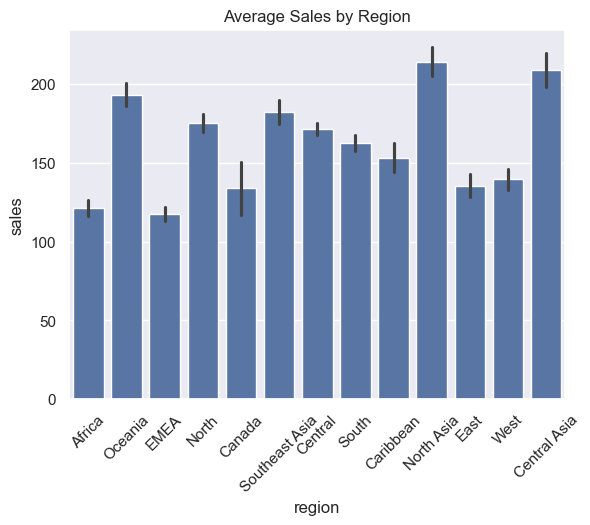

In [43]:
sns.barplot(x="region", y="sales", data=df)
plt.xticks(rotation=45)
plt.title("Average Sales by Region")
plt.show()

The chart illustrates the average sales across different regions. North Asia and Central Asia record the highest average sales, while Africa and EMEA show comparatively lower averages. The presence of error bars indicates variability within each region, suggesting that sales performance differs across transactions within the same region.

11. Correlation Matrix

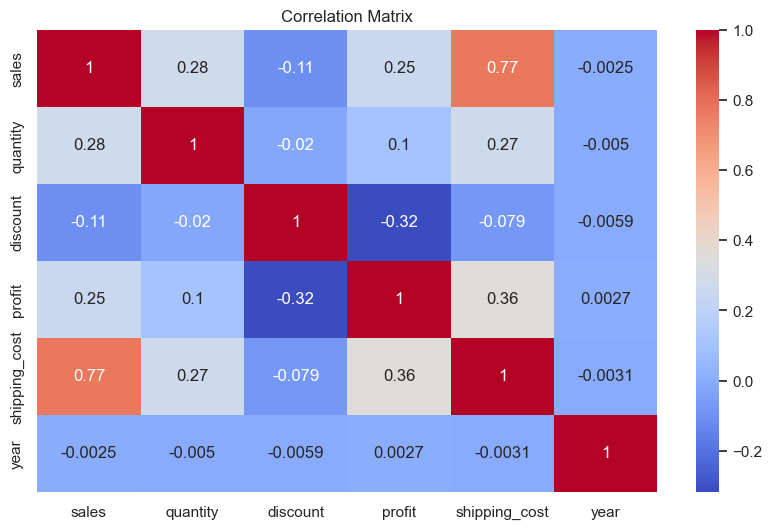

In [41]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows a strong positive relationship between sales and shipping cost (0.77). Sales also have a moderate positive correlation with profit (0.25). In contrast, discount has a negative correlation with profit (-0.32), suggesting that higher discounts tend to reduce profitability.

12. Time-Based Analysis

Monthly Sales Trend

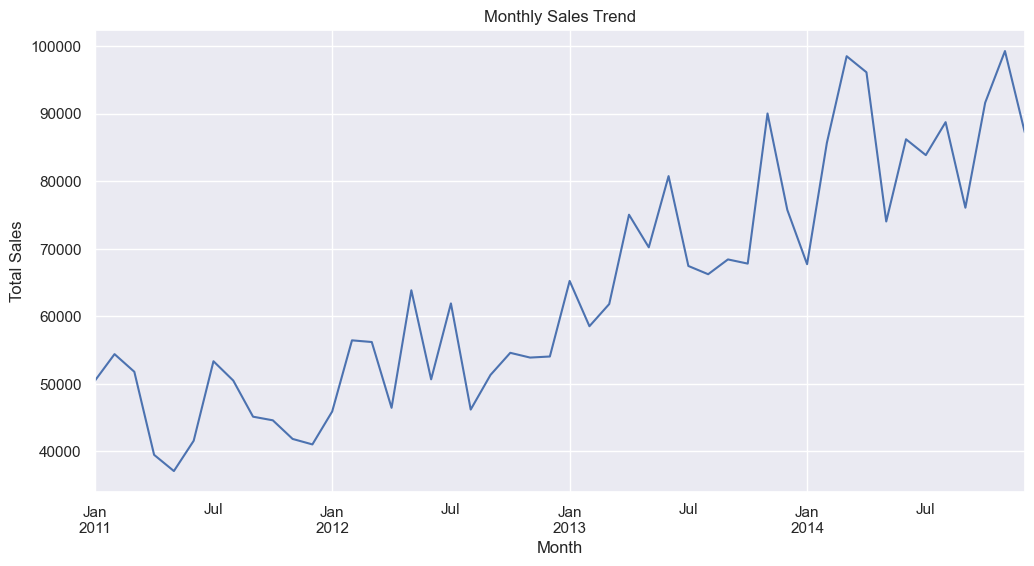

In [42]:
monthly_sales = df.groupby(df["order_date"].dt.to_period("M"))["sales"].sum()

monthly_sales.plot(figsize=(12,6))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

The monthly sales trend shows an overall upward growth pattern over the years. Despite periodic fluctuations, sales consistently increase from 2011 to 2014, indicating business expansion. Seasonal variations can also be observed, as certain months record higher sales compared to others.